3.Import the required packages with their customary aliases as follows:
    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`


In [220]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [222]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [224]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [226]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


In [228]:
# 5. How many rows and columns are in `gdp_df`? What are the data types of each column?
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


In [230]:
gdp_df.describe()

,Year,Value,Value Footnotes
count,8219.000000,8219.000000,0.0
mean,2006.672345,20270.976242,NaN
std,9.782986,22532.004246,NaN
min,1990.000000,510.822823,NaN
25%,1998.000000,4284.868430,NaN
50%,2007.000000,11916.457927,NaN
75%,2015.000000,28543.305542,NaN
max,2023.000000,174339.077325,NaN


In [232]:
# 6. Drop the `Value Footnotes` column 
gdp_df = gdp_df.drop('Value Footnotes', axis=1)

In [234]:
#  rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'
gdp_df = gdp_df.rename(columns={"Country or Area": "Country", "Value": "GDP_Per_Capita"})
print(gdp_df.describe())

              Year  GDP_Per_Capita
count  8219.000000     8219.000000
mean   2006.672345    20270.976242
std       9.782986    22532.004246
min    1990.000000      510.822823
25%    1998.000000     4284.868430
50%    2007.000000    11916.457927
75%    2015.000000    28543.305542
max    2023.000000   174339.077325


In [236]:
# 7. How many countries have data for all years? 
total_years = gdp_df['Year'].nunique()
print(f"Total unique years in the dataset: {total_years}")

Total unique years in the dataset: 34


In [238]:
country_year_counts = gdp_df.groupby(['Country','Year']).count()
print(country_year_counts)

                  GDP_Per_Capita
Country     Year                
Afghanistan 2000               1
            2001               1
            2002               1
            2003               1
            2004               1
...                          ...
Zimbabwe    2019               1
            2020               1
            2021               1
            2022               1
            2023               1

[8219 rows x 1 columns]


In [240]:
countries_with_all_years = country_year_counts[country_year_counts == total_years]

In [242]:
countries_with_all_years

GDP_Per_Capita
Country     Year                
Afghanistan 2000             NaN
            2001             NaN
            2002             NaN
            2003             NaN
            2004             NaN
...                          ...
Zimbabwe    2019             NaN
            2020             NaN
            2021             NaN
            2022             NaN
            2023             NaN

[8219 rows x 1 columns]

In [244]:
number_of_countries = len(countries_with_all_years)
print(number_of_countries)

8219


In [246]:
# Which countries are missing many years of data? Look at the number of observations per year. What do you notice?
print(countries_with_all_years.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8219 entries, ('Afghanistan', 2000) to ('Zimbabwe', 2023)
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GDP_Per_Capita  0 non-null      float64
dtypes: float64(1)
memory usage: 90.6+ KB
None


In [248]:
country_year_counts = gdp_df.groupby(['Country','Year']).count()
print(country_year_counts.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8219 entries, ('Afghanistan', 2000) to ('Zimbabwe', 2023)
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   GDP_Per_Capita  8219 non-null   int64
dtypes: int64(1)
memory usage: 90.6+ KB
None


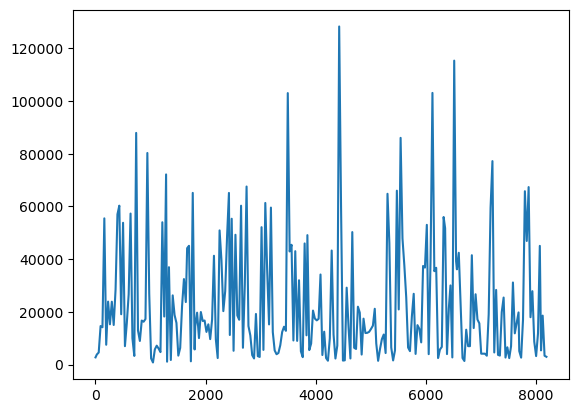

In [250]:
# 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. 
gdp_distribution = gdp_df[gdp_df["Year"] == 2020]["GDP_Per_Capita"]
plt.plot(gdp_distribution)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

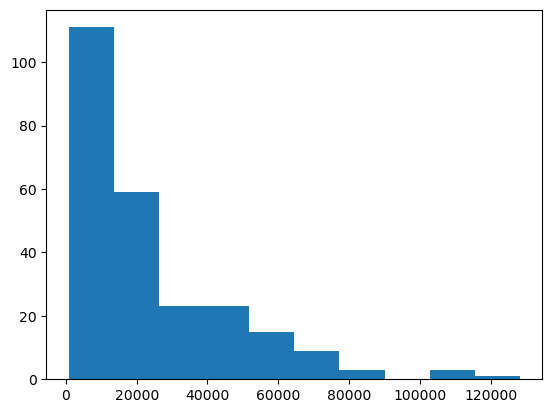

In [252]:
#Create a histogram
plt.hist(gdp_distribution)
plt.show

In [254]:
# density plot


In [ ]:
# 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 
# 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?
# 9. What was the median GDP per capita value in 2020?
# 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
# 	* A boxplot
# 	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
# 	* A scatterplot
# 	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
# Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.
# 11. Which country was the first to have a GDP per capita greater than $100,000?
# 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.
# 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?
# 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.
# 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.
# 16. Look at the number of observations in this dataset per year. What do you notice?
# 17. What is the first year to have a non-zero internet users percentage value?
# 18. How does the distribution of internet users percent differ for 2000 and 2014?
# 19. For how many countries was the percentage of internet users below 5% in 2014?
# 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.
# 21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?
# 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.
# 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.
# 24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".
# 25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

# ### Bonus exercise:
# 1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.
